# Decision trees - Over-fitting and regularization

<a target="_blank" href="https://colab.research.google.com/github/concordia-grad-computing-seminars/data-engineering/blob/main/ML/trees/regression_overfitting.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold

import matplotlib.pyplot as plt
%matplotlib inline

## Synthetic data set

To illustrate the concepts we will use a synthetic data set which we generate using the following function

In [2]:
def data(m=50, sigma=0.25):
    """
    Generates a data set of m points by adding Gaussian noise of variance sigma
    """
    x = np.sort(np.random.rand(m))
    y = -1 + np.sin(2*np.pi*x) + np.random.normal(0, sigma, m)
    return (x, y)

An example

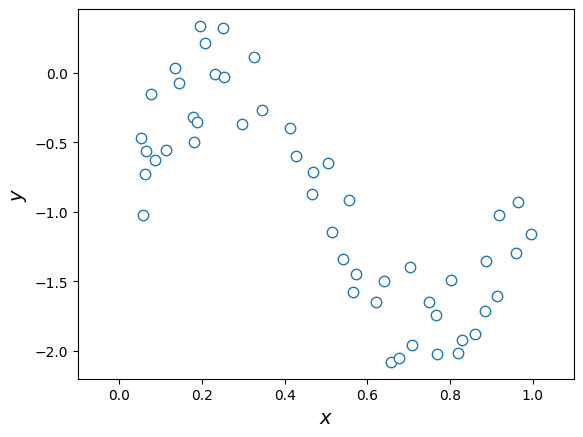

In [3]:
(x, y) = data()
plt.plot(x, y, ".", markersize=15, markerfacecolor='white')
plt.xlim([-0.1, 1.1])
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show()

## Regression tree training

In [4]:
# training and test sets
X_train, X_test, y_train, y_test = train_test_split(np.c_[x], y, test_size=0.1)

Without any extra restrictions, decision trees tends to over-fit.

In [5]:
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)

DecisionTreeRegressor()

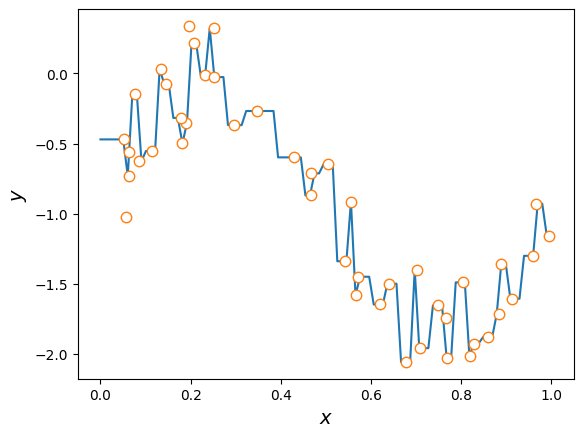

In [6]:
x_fit = np.linspace(0, 1, 100)
y_fit = reg.predict(np.c_[x_fit])
plt.plot(x_fit, y_fit, "-")
plt.plot(X_train, y_train, ".", markersize=15, markerfacecolor='white')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show()

In [7]:
# Mean squared error MSE on test set
y_pred = reg.predict(X_test)
((y_pred-y_test)**2).mean()

0.22333874297617173

Various hyper-parameters can be used to regularize the model. For example imposing a minimal number of samples in each leaf with `min_samples_leaf`.

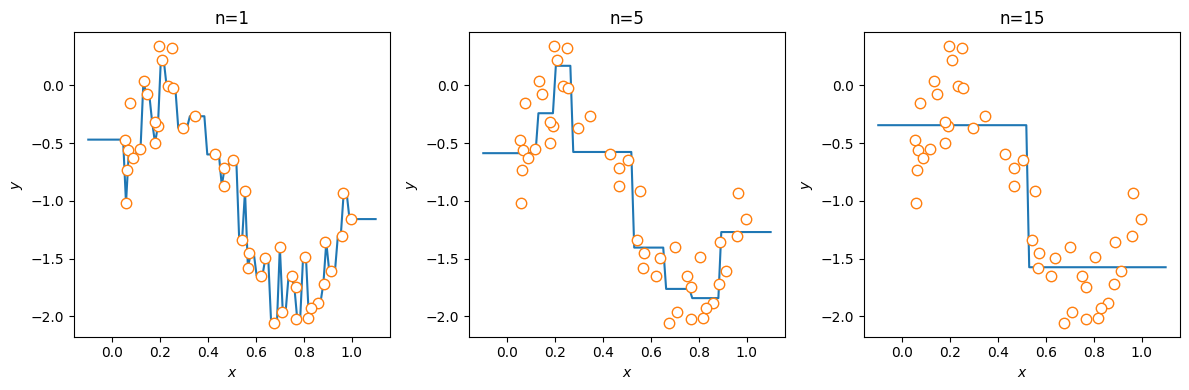

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
x_fit = np.linspace(-0.1, 1.1, 100)
X_fit = np.c_[x_fit]
i = 0

for n in [1, 5, 15]:
    reg = DecisionTreeRegressor(min_samples_leaf=n)
    reg.fit(X_train, y_train)
    y_fit = reg.predict(X_fit)
    ax[i].plot(x_fit, y_fit, "-")
    ax[i].plot(X_train, y_train, ".", markersize=15, markerfacecolor='white')
    ax[i].set_xlabel('$x$')
    ax[i].set_ylabel('$y$')
    ax[i].set_title('n=' + str(n))
    i = i+1
    
plt.tight_layout()
plt.show()

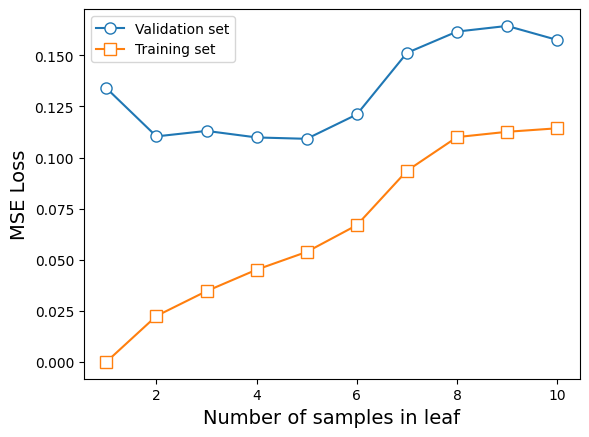

In [9]:
MSE_train = []
MSE_valid = []

n_max = 11
n_range = range(1, n_max)
for n in n_range:
    reg = DecisionTreeRegressor(min_samples_leaf=n)
    scores = cross_validate(reg, X_train, y_train,
                            cv=RepeatedKFold(n_splits=10, n_repeats=50),
                            scoring='neg_mean_squared_error', return_train_score=True)
    MSE_valid = np.append(MSE_valid, -scores['test_score'].mean())
    MSE_train = np.append(MSE_train, -scores['train_score'].mean())

plt.plot(n_range, MSE_valid, "o-", markersize=8, markerfacecolor='white', label='Validation set')
plt.plot(n_range, MSE_train, "s-", markersize=8, markerfacecolor='white', label='Training set')
plt.xlabel('Number of samples in leaf', fontsize=14)
plt.ylabel('MSE Loss', fontsize=14)
plt.legend(loc='best')
plt.show()

In [10]:
n_opt = n_range[np.argmin(MSE_valid)]

reg = DecisionTreeRegressor(min_samples_leaf=n_opt)
reg.fit(X_train, y_train)

# Mean squared error MSE on test set
y_pred = reg.predict(X_test)
((y_pred-y_test)**2).mean()

0.27098616666776143

## Suggested activities

* Read the documentation of the [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) class. List the hyper-parameters which can be tuned and give a short definition of them.
* Repeat the examples by tuning other hyper-parameters. Regularization is obtained by increasing the values of hyper-parameters of type `min_` or decreasing hyper-parameters of type `max_`.